In [2]:
#2. Perform the following operations using R/Python on the data sets:
#  a) Compute and display summary statistics for each feature available in the dataset. (e.g. minimum value, maximum value, mean, range, standard deviation, variance and percentiles
#  b) Illustrate the feature distributions using histogram. 
#  c) Data cleaning, Data integration, Data transformation, Data model building (e.g. Classification)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ds = pd.read_csv("C:/Users/anura/Downloads/Customers - Customers.csv")
ds.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:

ds.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


(array([ 52.,  50., 127., 289., 296., 239., 237., 253., 222., 235.]),
 array([     0. ,  18997.4,  37994.8,  56992.2,  75989.6,  94987. ,
        113984.4, 132981.8, 151979.2, 170976.6, 189974. ]),
 <BarContainer object of 10 artists>)

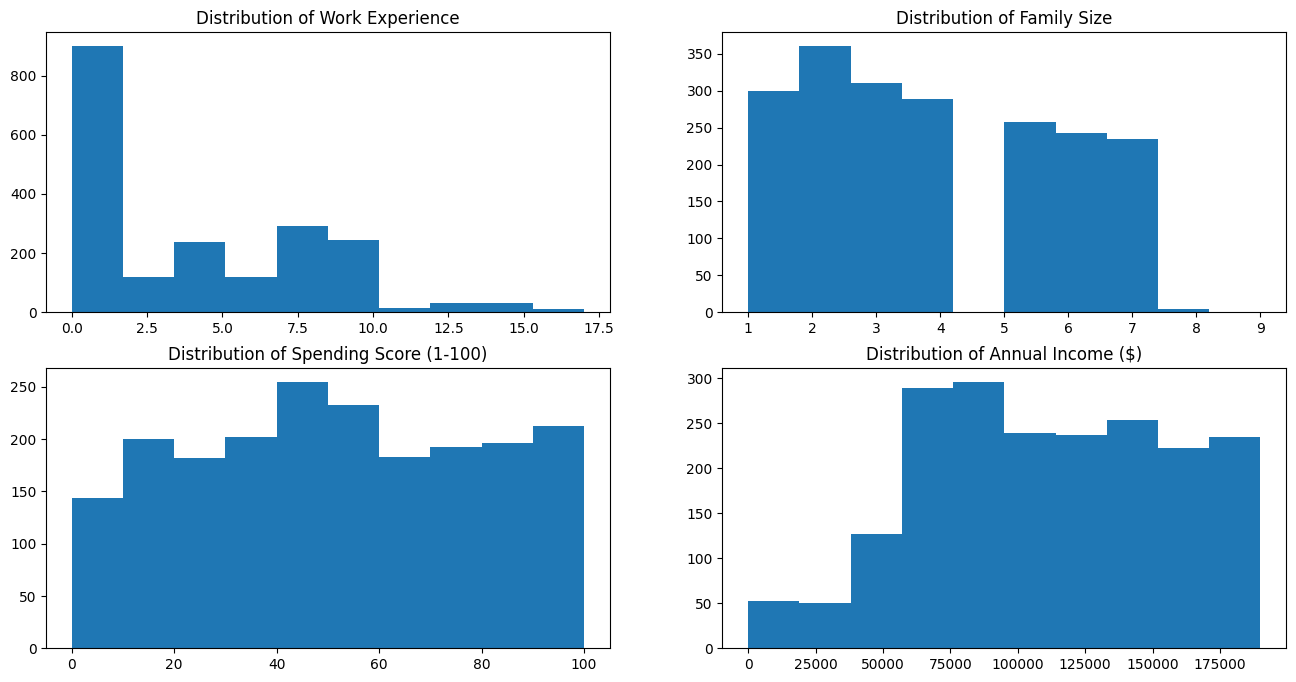

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))
axes[0,0].set_title("Distribution of Work Experience")
axes[0,0].hist(ds["Work Experience"])

axes[0,1].set_title("Distribution of Family Size")
axes[0,1].hist(ds["Family Size"])

axes[1,0].set_title("Distribution of Spending Score (1-100)")
axes[1,0].hist(ds["Spending Score (1-100)"])

axes[1,1].set_title("Distribution of Annual Income ($)")
axes[1,1].hist(ds["Annual Income ($)"])
     

In [7]:
ds.isnull()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False


In [9]:
# Replace NaN values in numeric columns with their mean
ds.fillna(ds.select_dtypes(include=['number']).mean(), inplace=True)

# Display the first few rows
ds.head()



,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [15]:
X = ds[["Work Experience", "Family Size", "Spending Score (1-100)", "Annual Income ($)"]]
y = ds["Age"]  # Make sure the column exists or is correctly handled


In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
     

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
regressor = LinearRegression()


In [24]:
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
print("Mean absolute error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test, y_pred))
print("R2 score: ", metrics.r2_score(y_test, y_pred))

Mean absolute error:  24.454144522069523
Mean squared error:  797.9122470983297
R2 score:  -0.0049850006223151055
